RM - 552915
Sibele Tatiana Gonçalves do Amaral


In [429]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn import metrics

df = pd.read_csv('/content/Spotify Most Streamed Songs - Spotify Most Streamed Songs.csv')
df.head(5)

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,cover_url
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553.0,147.0,141381703,NaN,...,B,Major,80,89,83,31,0,8,4,Not Found
1,LALA,Myke Towers,1,2023,3,23,1474.0,48.0,133716286,NaN,...,C#,Major,71,61,74,7,0,10,4,https://i.scdn.co/image/ab67616d0000b2730656d5...
2,vampire,Olivia Rodrigo,1,2023,6,30,1397.0,113.0,140003974,NaN,...,F,Major,51,32,53,17,0,31,6,https://i.scdn.co/image/ab67616d0000b273e85259...
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858.0,100.0,800840817,NaN,...,A,Major,55,58,72,11,0,11,15,https://i.scdn.co/image/ab67616d0000b273e787cf...
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133.0,50.0,303236322,NaN,...,A,Minor,65,23,80,14,63,11,6,https://i.scdn.co/image/ab67616d0000b273ab5c9c...


In [430]:
df1 = df.copy()


In [431]:
df1['in_deezer_playlists'] = pd.to_numeric(df['in_deezer_playlists'], errors='coerce')
df1['in_deezer_playlists'] = pd.to_numeric(df['in_deezer_playlists'], errors='coerce')
df1['in_shazam_charts'] = pd.to_numeric(df['in_shazam_charts'], errors='coerce')


In [432]:
isnulled = df.isnull().sum()
isnulled

,0
track_name,0
artist(s)_name,0
artist_count,0
released_year,0
released_month,0
released_day,0
in_spotify_playlists,25
in_spotify_charts,27
streams,0
in_apple_playlists,22


In [433]:
df1['category_streams'] = -1
df1['category_streams'] = df1.apply(lambda row: 0 if row['streams'] < df1['streams'].quantile(0.30) else row['category_streams'], axis=1)
df1['category_streams'] = df1.apply(lambda row: 2 if row['streams'] > df1['streams'].quantile(0.60) else row['category_streams'], axis=1)
df1['category_streams'] = df1.apply(lambda row: 1 if row['category_streams'] == -1 else row['category_streams'], axis=1)
df1['category_streams'].value_counts()

,count
category_streams,
2,63
0,48
1,47


In [435]:
df1_0 = df1[df1['category_streams'] == 0].sample(47)
df1_1 = df1[df1['category_streams'] == 1].sample(47)
df1_2 = df1[df1['category_streams'] == 2].sample(47)
df1 = pd.concat([df1_0, df1_1, df1_2])
df1['category_streams'].value_counts()


,count
category_streams,
0,47
1,47
2,47


In [437]:
del df1['in_spotify_playlists']
del df1['in_spotify_charts']
del df1['in_apple_playlists']
del df1['in_apple_charts']
del df1['mode']
del df1['key']

In [438]:
percentile_30 = df1['streams'].quantile(0.30)
percentile_60 = df1['streams'].quantile(0.60)

df1['category_streams'] = df1['streams'].apply(lambda x: 0 if x < percentile_30 else (2 if x > percentile_60 else 1))



In [439]:
del df1['track_name']
del df1['artist(s)_name']
del df1['cover_url']
del df1['streams']

In [440]:
del df1['in_deezer_playlists']
del df1['in_shazam_charts']
df1.isnull().sum()

,0
artist_count,0
released_year,0
released_month,0
released_day,0
in_deezer_charts,0
bpm,0
danceability_%,0
valence_%,0
energy_%,0
acousticness_%,0


In [441]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

x = df1.drop('category_streams', axis='columns')
y = df1['category_streams']
x_scaled = preprocessing.StandardScaler().fit(x)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.5)
d = {'lbfgs':0, 'liblinear':0, 'newton-cg':0,  'newton-cholesky':0, 'sag':0, 'saga':0}

for k in d.keys():
  classifier = LogisticRegression(max_iter=100, solver=k)
  classifier.fit(x_train, y_train)
  y_pred = classifier.predict(x)
  print(f"Accuracy {k}:", accuracy_score(y, y_pred))
  d[k] = accuracy_score(y, y_pred)

classifier = LogisticRegression(max_iter=100000, solver=max(d, key=d.get))
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x)
print(f"Chosen one ",max(d, key=d.get) ,":", accuracy_score(y, y_pred))
d[k] = accuracy_score(y, y_pred)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/optimize.py:318: ConvergenceWarning: newton-cg failed to converge at loss = 0.6646663575412567. Increase the number of iterations.
  warnings.warn(


Accuracy lbfgs: 0.46099290780141844
Accuracy liblinear: 0.48936170212765956
Accuracy newton-cg: 0.6312056737588653
Accuracy newton-cholesky: 0.6453900709219859
Accuracy sag: 0.4397163120567376
Accuracy saga: 0.3971631205673759
Chosen one  newton-cholesky : 0.6453900709219859


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


<Axes: >

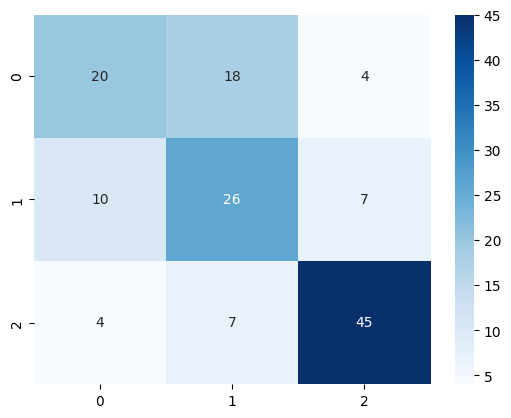

In [442]:
y_pred = classifier.predict(x)
matrix = confusion_matrix(y, y_pred)
# sns.heatmap(matrix/np.sum(matrix), annot=True, fmt='.2%', cmap='Reds')
sns.heatmap(matrix, annot=True, fmt='d', cmap="Blues")
# matrix

In [443]:
print(metrics.classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.59      0.48      0.53        42
           1       0.51      0.60      0.55        43
           2       0.80      0.80      0.80        56

    accuracy                           0.65       141
   macro avg       0.63      0.63      0.63       141
weighted avg       0.65      0.65      0.64       141



In [444]:
df1['category_streams']=df1.apply(lambda row: 2 if row['category_streams'] == 2 else 1, axis=1)
df1['category_streams'].value_counts()

,count
category_streams,
1,85
2,56


In [445]:
x = df1.drop('category_streams', axis='columns')
y = df1['category_streams']
x_scaled = preprocessing.StandardScaler().fit(x)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.5)
d = {'lbfgs':0, 'liblinear':0, 'newton-cg':0,  'newton-cholesky':0, 'sag':0, 'saga':0}

for k in d.keys():
  classifier = LogisticRegression(max_iter=100, solver=k)
  classifier.fit(x_train, y_train)
  y_pred = classifier.predict(x)
  print(f"Accuracy {k}:", accuracy_score(y, y_pred))
  d[k] = accuracy_score(y, y_pred)

classifier = LogisticRegression(max_iter=100000, solver=max(d, key=d.get))
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x)
print(f"Chosen one ",max(d, key=d.get) ,":", accuracy_score(y, y_pred))
d[k] = accuracy_score(y, y_pred)

Accuracy lbfgs: 0.6666666666666666
Accuracy liblinear: 0.6524822695035462
Accuracy newton-cg: 0.8226950354609929
Accuracy newton-cholesky: 0.8297872340425532
Accuracy sag: 0.6028368794326241
Accuracy saga: 0.5957446808510638
Chosen one  newton-cholesky : 0.8297872340425532


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



A melhor acurácia do modelo após a vmodificação da variável de interesse melhorou.